In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from pathlib import Path # I include this so that it will run to all the places with giving error
directory = Path(__name__).parent.absolute()

In [3]:
data = pd.read_csv(str(directory)+'/Datasets/gene_expression(in).csv')

In [4]:
data

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1
...,...,...,...
2995,5.0,6.5,1
2996,3.4,6.6,0
2997,2.7,6.5,0
2998,3.3,5.6,0


<Axes: xlabel='Gene One', ylabel='Gene Two'>

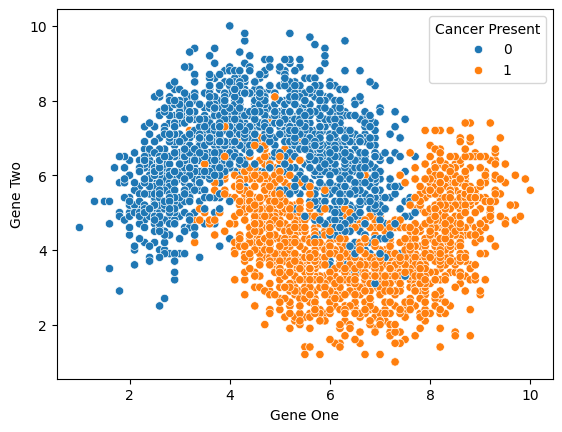

In [5]:
sns.scatterplot(x='Gene One',y='Gene Two',hue='Cancer Present',data=data)

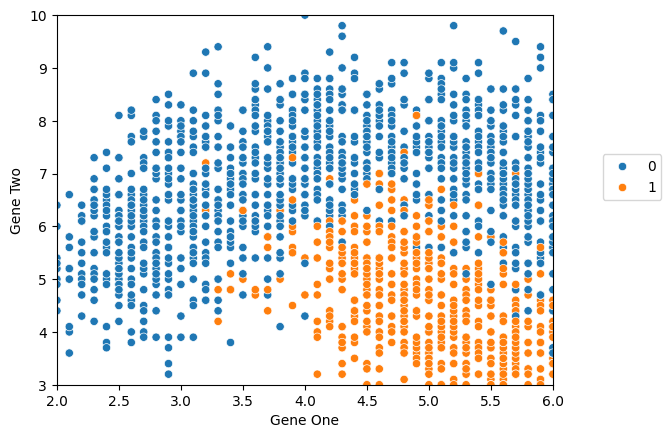

In [6]:
sns.scatterplot(x='Gene One',y='Gene Two',hue='Cancer Present',data=data)
plt.xlim(2,6)
plt.ylim(3,10)
plt.legend(loc=(1.1,.5))
plt.show()

### Traning and testing data

In [33]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler,MaxAbsScaler

In [8]:
X = data.drop(['Cancer Present'], axis = 1)

In [9]:
X

,Gene One,Gene Two
0,4.3,3.9
1,2.5,6.3
2,5.7,3.9
3,6.1,6.2
4,7.4,3.4
...,...,...
2995,5.0,6.5
2996,3.4,6.6
2997,2.7,6.5
2998,3.3,5.6


In [10]:
y = data.drop(['Gene One','Gene Two'], axis = 1)

In [11]:
y

,Cancer Present
0,1
1,0
2,1
3,0
4,1
...,...
2995,1
2996,0
2997,0
2998,0


In [12]:
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.2,random_state=42)

In [13]:
xtrain.shape

(2400, 2)

In [14]:
xtest.shape

(600, 2)

In [15]:
scaler = StandardScaler()

In [16]:
scaler

StandardScaler()

In [17]:
Scaled_X_train = scaler.fit_transform(xtrain)
scaled_X_test = scaler.transform(xtest)

In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [19]:
knn = KNeighborsClassifier(n_neighbors=3)

In [20]:
knn.fit(Scaled_X_train,ytrain)

/home/runner/workspace/.pythonlibs/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

### Model Evaluation

In [21]:
ypred = knn.predict(scaled_X_test)

In [22]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [23]:
accuracy_score(ytest,ypred)

0.9283333333333333

In [24]:
cm = confusion_matrix(ytest,ypred)

<Axes: >

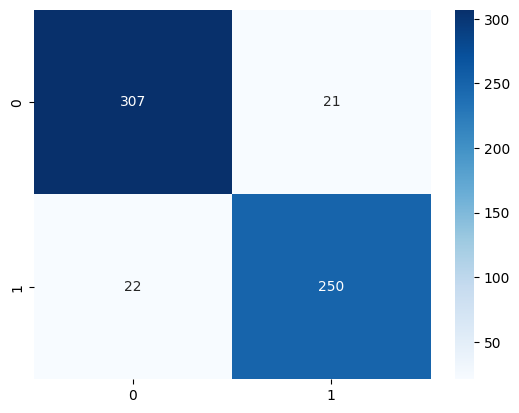

In [25]:
sns.heatmap(cm,annot=True,cmap='Blues',fmt='d')    #fmt = formet decimal formet 

In [26]:
knn.predict([[4.3,3.9]])

array([1])

In [28]:
model = KNeighborsClassifier(n_neighbors=3)

In [29]:
model.fit(xtrain,ytrain)

/home/runner/workspace/.pythonlibs/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

In [30]:
pred = model.predict(xtest)

In [31]:
accuracy_score(ytest,pred)

0.9233333333333333

In [34]:
scaler = MaxAbsScaler()

In [35]:
scaler

MaxAbsScaler()

In [36]:
Scaled_X_train = scaler.fit_transform(xtrain)
scaled_X_test = scaler.transform(xtest)

In [37]:
scaler

MaxAbsScaler()

In [38]:
km = KNeighborsClassifier(n_neighbors=3)
km.fit(Scaled_X_train,ytrain)
pred = km.predict(scaled_X_test)
accuracy_score(ytest,pred)

/home/runner/workspace/.pythonlibs/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9283333333333333